# Demo pandas

this notebook will show basic features of the python pandas library. A small set of daily sales data in dollars will be merged with currency echange data. Sales amounts will then be calculated for each currency

---

### Create a file called `daily_sales.csv` with some 'sales' data

In [145]:
%%file daily_sales.csv
'2019-01-01',2232.34
'2019-01-02',3243.44
'2019-01-03',5600.00
'2019-01-04',1201.00
'2019-01-05',1001.00
'2019-01-06',2393.00
'2019-01-07',4553.23


Overwriting daily_sales.csv


---
### Get some currency exchange data from `fixer.io`. 

In [32]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
url = 'http://data.fixer.io/api/2019-01-0{}?access_key=0d42cb7784f935274890532412c952af'

#### Pandas provides some really nice convenience methods for getting data in and out.  a

here we go from url to pandas dataframe with a simple call to `read_json`

In [33]:
df = pd.read_json(url.format(1))

#### panda dataframes can be quickly peeked at with 
- `df.head()`
- `df.tail()` 
- `df[x:y]`
- `df`

In [43]:
df[:10]

,base,date,historical,rates,success,timestamp
AED,EUR,2019-01-01,True,4.210,True,2019-01-01 23:59:59
AFN,EUR,2019-01-01,True,86.664,True,2019-01-01 23:59:59
ALL,EUR,2019-01-01,True,123.873,True,2019-01-01 23:59:59
AMD,EUR,2019-01-01,True,554.799,True,2019-01-01 23:59:59
ANG,EUR,2019-01-01,True,2.029,True,2019-01-01 23:59:59
AOA,EUR,2019-01-01,True,353.702,True,2019-01-01 23:59:59
ARS,EUR,2019-01-01,True,43.157,True,2019-01-01 23:59:59
AUD,EUR,2019-01-01,True,1.626,True,2019-01-01 23:59:59
AWG,EUR,2019-01-01,True,2.063,True,2019-01-01 23:59:59
AZN,EUR,2019-01-01,True,1.951,True,2019-01-01 23:59:59


---
#### Now grab some more days worth of currency data with five requests

concat all the exchange data into a single dataframe

In [101]:
df_j = pd.concat([df] + [ pd.read_json(url.format(x)) for x in range(2,9)])

# Calling reset_index makes the currency a regular column as well as index.
# Without this the currency code was getting dropped in the merge later. 
df_j=df_j.reset_index()

In [102]:
df_j.head()

,index,base,date,historical,rates,success,timestamp
0,AED,EUR,2019-01-01,True,4.210,True,2019-01-01 23:59:59
1,AFN,EUR,2019-01-01,True,86.664,True,2019-01-01 23:59:59
2,ALL,EUR,2019-01-01,True,123.873,True,2019-01-01 23:59:59
3,AMD,EUR,2019-01-01,True,554.799,True,2019-01-01 23:59:59
4,ANG,EUR,2019-01-01,True,2.029,True,2019-01-01 23:59:59


In [103]:
df_j.tail()

,index,base,date,historical,rates,success,timestamp
1339,YER,EUR,2019-01-08,True,286.794,True,2019-01-08 23:59:59
1340,ZAR,EUR,2019-01-08,True,15.994,True,2019-01-08 23:59:59
1341,ZMK,EUR,2019-01-08,True,10311.522,True,2019-01-08 23:59:59
1342,ZMW,EUR,2019-01-08,True,13.663,True,2019-01-08 23:59:59
1343,ZWL,EUR,2019-01-08,True,369.281,True,2019-01-08 23:59:59


---
### Read and merge the sales data

In [146]:
df_csv = pd.read_csv('daily_sales.csv', names=['date','amount'], parse_dates=['date'])
df_csv

,date,amount
0,2019-01-01,2232.340
1,2019-01-02,3243.440
2,2019-01-03,5600.000
3,2019-01-04,1201.000
4,2019-01-05,1001.000
5,2019-01-06,2393.000
6,2019-01-07,4553.230


In [147]:
df_merged = pd.merge(df_j, df_csv, on='date')
df_merged.head()

,index,base,date,historical,rates,success,timestamp,amount
0,AED,EUR,2019-01-01,True,4.210,True,2019-01-01 23:59:59,2232.340
1,AFN,EUR,2019-01-01,True,86.664,True,2019-01-01 23:59:59,2232.340
2,ALL,EUR,2019-01-01,True,123.873,True,2019-01-01 23:59:59,2232.340
3,AMD,EUR,2019-01-01,True,554.799,True,2019-01-01 23:59:59,2232.340
4,ANG,EUR,2019-01-01,True,2.029,True,2019-01-01 23:59:59,2232.340


---
### select records for pounds, dollars and rubles, dropping non-essentail columns

In [148]:
# there are different ways to do this...
bools = df_merged['index'].isin(['GBP','USD','RUB'])

df_selected = df_merged[bools][['date', 'index', 'rates', 'amount']]
df_selected.tail()

,date,index,rates,amount
962,2019-01-06,RUB,77.122,2393.000
989,2019-01-06,USD,1.141,2393.000
1057,2019-01-07,GBP,0.898,4553.230
1130,2019-01-07,RUB,76.663,4553.230
1157,2019-01-07,USD,1.148,4553.230


---
### add a new column calculated by: converted = rate * amount

In [153]:
df_selected['converted'] = df_selected.rates * df_selected.amount 
df_selected.head()

,date,index,rates,amount,converted
49,2019-01-01,GBP,0.899,2232.340,2006.153
122,2019-01-01,RUB,79.000,2232.340,176353.862
149,2019-01-01,USD,1.146,2232.340,2558.541
217,2019-01-02,GBP,0.904,3243.440,2931.836
290,2019-01-02,RUB,78.160,3243.440,253506.518


### Plot
pandas has matplotlib plotting built-in. This is a silly example plot.

index
GBP    AxesSubplot(0.125,0.125;0.775x0.755)
RUB    AxesSubplot(0.125,0.125;0.775x0.755)
USD    AxesSubplot(0.125,0.125;0.775x0.755)
Name: converted, dtype: object

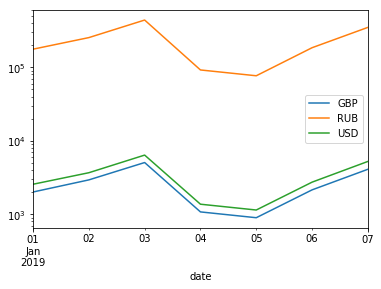

In [154]:
df_selected.set_index('date', inplace=True)
df_selected.groupby('index')['converted'].plot(legend=True, logy=True)